In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import FastICA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import decomposition
from sklearn.feature_selection import SelectPercentile as sp
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv('windows7_dataset.csv')

C:\Users\serev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,47,48,49,50,51,52,59,60,61,65,66,67,71,72,73,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,104,105,106,107,109,112,113,116,127,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,ts,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
0,1554185566,0,90.20833333,0,0.208333333,0,2.083333333,88.00928867,9.791666667,216.6151809,...,414,26374144,31.95524227,926330880,5849088,1957.675542,48304128,0,0,normal
1,1554185581,0,99.79166667,0,0,0,0.104166667,98.92048733,0.208333333,67.86145672,...,418,27045888,1.199907879,924794880,5849088,0.133323098,48107520,0,0,normal
2,1554185596,0,99.79166667,0,0,0,0.208333333,99.17886667,0.208333333,65.9999186,...,419,27353088,0.133333169,925319168,5849088,0,48033792,0,0,normal
3,1554185611,0,99.6875,0,0,0,0.104166667,99.218316,0.3125,67.39927613,...,425,27533312,0.133331901,916725760,5849088,1.066655211,47960064,0.133331901,0,normal
4,1554185626,0,99.79166667,0,0,0,0.208333333,99.24871267,0.208333333,65.53277281,...,426,27688960,0.133332193,916025344,5849088,0,47943680,0,0,normal


In [4]:
df.isnull().sum()

ts                                       0
Processor(_Total) DPC Rate               0
Processor(_Total) pct_ Idle Time         0
Processor(_Total) pct_ C3 Time           0
Processor(_Total) pct_ Interrupt Time    0
                                        ..
Memory Pages Input sec                   0
Memory Pool Paged Resident Bytes         0
Memory Write Copies sec                  0
label                                    0
type                                     0
Length: 135, dtype: int64

In [5]:
target = df.loc[:, ('type')]

In [6]:
df = df.replace(np.NaN, 0)
df = df.replace('', 0)
df = df.replace(' ', 0)

In [7]:
df = df.drop('type', axis = 1)
df = df.drop('ts', axis = 1)
df

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label
0,0,90.20833333,0,0.208333333,0,2.083333333,88.00928867,9.791666667,216.6151809,0.208333333,...,33557825,414,26374144,31.95524227,926330880,5849088,1957.675542,48304128,0,0
1,0,99.79166667,0,0,0,0.104166667,98.92048733,0.208333333,67.86145672,0,...,33557823,418,27045888,1.199907879,924794880,5849088,0.133323098,48107520,0,0
2,0,99.79166667,0,0,0,0.208333333,99.17886667,0.208333333,65.9999186,0,...,33557823,419,27353088,0.133333169,925319168,5849088,0,48033792,0,0
3,0,99.6875,0,0,0,0.104166667,99.218316,0.3125,67.39927613,0,...,33557823,425,27533312,0.133331901,916725760,5849088,1.066655211,47960064,0.133331901,0
4,0,99.79166667,0,0,0,0.208333333,99.24871267,0.208333333,65.53277281,0,...,33557823,426,27688960,0.133332193,916025344,5849088,0,47943680,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28362,25,0,0,0,0,0,0,0,0,0,...,33556745,556,14307328,0,786292736,5992448,0,83357696,0,1
28363,1,19.67469099,0,1.249186729,0,52.04944706,18.12026099,80.32530901,147.7217362,2.186076777,...,33557769,203,1306624,11841.67035,1139634176,5992448,5591.894332,88555520,114.5243424,1
28364,3,78.75,0,0,0,16.14583333,72.65426533,21.25,88.26378162,0.104166667,...,33557703,243,1363968,40.73200194,1096425472,5992448,221.7927503,90275840,74.3309037,1
28365,1,90.3125,0,0,0,8.958333333,85.036102,9.6875,80.26738693,0,...,33557703,196,1388544,4.333372218,1143648256,5992448,3.26669598,90230784,0,1


In [8]:
for i in df.columns:
    if len(df[i].unique()) == 1: df = df.drop(i, axis = 1)
df

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label
0,0,90.20833333,0,0.208333333,0,2.083333333,88.00928867,9.791666667,216.6151809,0.208333333,...,33557825,414,26374144,31.95524227,926330880,5849088,1957.675542,48304128,0,0
1,0,99.79166667,0,0,0,0.104166667,98.92048733,0.208333333,67.86145672,0,...,33557823,418,27045888,1.199907879,924794880,5849088,0.133323098,48107520,0,0
2,0,99.79166667,0,0,0,0.208333333,99.17886667,0.208333333,65.9999186,0,...,33557823,419,27353088,0.133333169,925319168,5849088,0,48033792,0,0
3,0,99.6875,0,0,0,0.104166667,99.218316,0.3125,67.39927613,0,...,33557823,425,27533312,0.133331901,916725760,5849088,1.066655211,47960064,0.133331901,0
4,0,99.79166667,0,0,0,0.208333333,99.24871267,0.208333333,65.53277281,0,...,33557823,426,27688960,0.133332193,916025344,5849088,0,47943680,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28362,25,0,0,0,0,0,0,0,0,0,...,33556745,556,14307328,0,786292736,5992448,0,83357696,0,1
28363,1,19.67469099,0,1.249186729,0,52.04944706,18.12026099,80.32530901,147.7217362,2.186076777,...,33557769,203,1306624,11841.67035,1139634176,5992448,5591.894332,88555520,114.5243424,1
28364,3,78.75,0,0,0,16.14583333,72.65426533,21.25,88.26378162,0.104166667,...,33557703,243,1363968,40.73200194,1096425472,5992448,221.7927503,90275840,74.3309037,1
28365,1,90.3125,0,0,0,8.958333333,85.036102,9.6875,80.26738693,0,...,33557703,196,1388544,4.333372218,1143648256,5992448,3.26669598,90230784,0,1


In [9]:
def whitespace_remover(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype == 'object': 
            dataframe[i] = dataframe[i].astype(str)
        else: pass

In [10]:
whitespace_remover(df)

In [11]:
def converter(dataframe):
    for i in dataframe.columns:
        dataframe[i] = pd.to_numeric(dataframe[i])

In [12]:
converter(df)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df = df.replace(np.NaN, 0)
df = df.replace('', 0)

In [15]:
df.isnull().sum().sum()

0

In [16]:
cat = []
for i in df.columns:
    if len(df[i].unique()) <= 20: cat.append(i)
df_cat = df[cat]
df_cat

,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ C2 Time,Processor(_Total) C2 Transitions sec,Processor(_Total) C3 Transitions sec,Network_I(6TO4 Adapter) Bytes Received sec,Network_I(isatap{B4D100D3-}) Bytes Received sec,Network_I(6TO4 Adapter) Bytes Sent sec,Network_I(isatap{B4D100D3-}) Bytes Sent sec,Network_I(6TO4 Adapter) Bytes Total sec,Network_I(isatap{B4D100D3-}) Bytes Total sec,...,Network_I(isatap{B4D100D3-}) Packets Received Unicast sec,Network_I(6TO4 Adapter) Packets Sent Non-Unicast sec,Network_I(isatap{B4D100D3-}) Packets Sent Non-Unicast sec,Network_I(Intel R _Pro_1000MT) Packets Sent Non-Unicast sec,Network_I(6TO4 Adapter) Packets Received Non-Unicast sec,Network_I(isatap{B4D100D3-}) Packets Received Non-Unicast sec,Network_I(Intel R _Pro_1000MT) Packets Received Non-Unicast sec,Memory System Code Total Bytes,Memory System Driver Total Bytes,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5849088,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5849088,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5849088,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5849088,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5849088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5992448,1
28363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5992448,1
28364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5992448,1
28365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7155712,5992448,1


In [17]:
df_temp = df.drop(cat, axis = 1)
df_temp

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,Processor(_Total) pct_ Privileged Time,Processor(_Total) DPCs Queued sec,...,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec
0,0,90.208333,0.208333,2.083333,88.009289,9.791667,216.615181,0.208333,7.708333,278.457581,...,57084,43.146341,33557825,414,26374144,31.955242,926330880,1957.675542,48304128,0.000000
1,0,99.791667,0.000000,0.104167,98.920487,0.208333,67.861457,0.000000,0.104167,5.666232,...,57024,43.074798,33557823,418,27045888,1.199908,924794880,0.133323,48107520,0.000000
2,0,99.791667,0.000000,0.208333,99.178867,0.208333,65.999919,0.000000,0.000000,2.266664,...,56986,43.099218,33557823,419,27353088,0.133333,925319168,0.000000,48033792,0.000000
3,0,99.687500,0.000000,0.104167,99.218316,0.312500,67.399276,0.000000,0.208333,4.399953,...,56600,42.698957,33557823,425,27533312,0.133332,916725760,1.066655,47960064,0.133332
4,0,99.791667,0.000000,0.208333,99.248713,0.208333,65.532773,0.000000,0.000000,2.266647,...,56495,42.666333,33557823,426,27688960,0.133332,916025344,0.000000,47943680,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28362,25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55114,29.768632,33556745,556,14307328,0.000000,786292736,0.000000,83357696,0.000000
28363,1,19.674691,1.249187,52.049447,18.120261,80.325309,147.721736,2.186077,28.210800,951.991929,...,61010,43.145954,33557769,203,1306624,11841.670350,1139634176,5591.894332,88555520,114.524342
28364,3,78.750000,0.000000,16.145833,72.654265,21.250000,88.263782,0.104167,5.104167,133.462304,...,60719,41.510095,33557703,243,1363968,40.732002,1096425472,221.792750,90275840,74.330904
28365,1,90.312500,0.000000,8.958333,85.036102,9.687500,80.267387,0.000000,0.729167,99.000888,...,60390,43.297925,33557703,196,1388544,4.333372,1143648256,3.266696,90230784,0.000000


In [18]:
scaler = StandardScaler()
df[df_temp.columns] = scaler.fit_transform(df[df_temp.columns])
df

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label
0,-0.650324,0.538974,0,0.043790,0,-0.495916,0.509190,-0.538488,-0.740892,-0.166410,...,-0.491166,0.226222,1.333648,0.023465,-1.579854,5849088,-0.236116,1.578343,-0.250639,0
1,-0.650324,0.992171,0,-0.414917,0,-0.695519,1.024445,-0.992823,-0.839571,-0.500286,...,-0.491995,0.237280,1.385156,-0.026357,-1.581545,5849088,-0.785287,1.565260,-0.250639,0
2,-0.650324,0.992171,0,-0.414917,0,-0.685013,1.036646,-0.992823,-0.840805,-0.500286,...,-0.491995,0.240045,1.408711,-0.028084,-1.580968,5849088,-0.785325,1.560354,-0.250639,0
3,-0.650324,0.987245,0,-0.414917,0,-0.695519,1.038509,-0.987885,-0.839877,-0.500286,...,-0.491995,0.256633,1.422530,-0.028084,-1.590426,5849088,-0.785026,1.555448,-0.239160,0
4,-0.650324,0.992171,0,-0.414917,0,-0.685013,1.039944,-0.992823,-0.841115,-0.500286,...,-0.491995,0.259397,1.434465,-0.028084,-1.591197,5849088,-0.785325,1.554358,-0.250639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28362,0.194286,-3.726994,0,-0.414917,0,-0.706024,-3.646834,-1.002700,-0.884588,-0.500286,...,-0.938798,0.618801,0.408398,-0.028300,-1.733987,5992448,-0.785325,3.910912,-0.250639,1
28363,-0.616540,-2.796575,0,2.335538,0,4.543266,-2.791149,2.805432,-0.786594,3.003133,...,-0.514377,-0.357118,-0.588461,19.154534,-1.345082,5992448,0.783432,4.256791,9.608974,1
28364,-0.548971,-0.002893,0,-0.414917,0,0.922315,-0.215914,0.004739,-0.826036,-0.333348,...,-0.541732,-0.246532,-0.584064,0.037683,-1.392640,5992448,-0.723103,4.371266,6.148646,1
28365,-0.616540,0.543900,0,-0.414917,0,0.197441,0.368789,-0.543426,-0.831341,-0.500286,...,-0.541732,-0.376471,-0.582180,-0.021281,-1.340664,5992448,-0.784408,4.368268,-0.250639,1


In [19]:
target.unique()

array(['normal', 'ddos', 'backdoor', 'injection', 'password', 'xss',
       'scanning', 'ransomware'], dtype=object)

In [20]:
target.value_counts()

normal        22387
ddos           2134
backdoor       1779
injection       998
password        757
scanning        226
ransomware       82
xss               4
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x1b18ac179a0>,
 [Text(-1561.4201005637983, 1217.5250591077536, 'normal'),
  Text(918.8596637724838, -1753.8805313623614, 'ddos'),
  Text(1570.4112288825766, -1205.9057061808426, 'backdoor'),
  Text(1861.7801532152255, -673.9248185768887, 'injection'),
  Text(1956.8874020294727, -301.64829815257025, 'password'),
  Text(1978.0768904621332, -87.24571863225567, 'scanning'),
  Text(1979.90164646997, -19.735002039607423, 'ransomware'),
  Text(1979.999805715753, -0.8771348709296105, 'xss')])

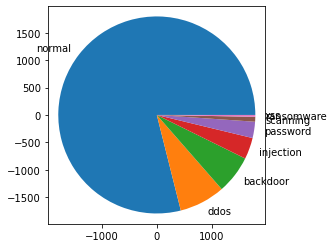

In [31]:
y = np.array([22387, 2134, 1779, 998, 757, 226, 82, 4])
mylabels = ['normal', 'ddos', 'backdoor', 'injection', 'password', 'scanning', 'ransomware', 'xss']
plt.pie(y, labels = mylabels, radius=1800, frame=True)

In [20]:
label_encoder = preprocessing.LabelEncoder()
target = label_encoder.fit_transform(target)

In [21]:
def lr(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_lr = LogisticRegression()
    model_lr.fit(x_train, y_train)
    preds = model_lr.predict(x_test)
    return accuracy_score(y_test, preds)

In [22]:
def dtc(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_dtc = DecisionTreeClassifier()   
    model_dtc.fit(x_train, y_train)
    preds = model_dtc.predict(x_test)
    return accuracy_score(y_test, preds)

In [23]:
def rfc(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_rfc = RandomForestClassifier()    
    model_rfc.fit(x_train, y_train)
    preds = model_rfc.predict(x_test)
    return accuracy_score(y_test, preds)

In [24]:
def knn(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_knn = KNeighborsClassifier()
    model_knn.fit(x_train, y_train)
    preds = model_knn.predict(x_test)
    return accuracy_score(y_test, preds)

In [25]:
def svm(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_svm = SVC(kernel = 'sigmoid')
    model_svm.fit(x_train, y_train) 
    preds = model_svm.predict(x_test)
    return accuracy_score(y_test, preds)

In [26]:
def nb(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_nb = GaussianNB()
    model_nb.fit(x_train, y_train)
    preds = model_nb.predict(x_test)
    return accuracy_score(y_test, preds)

In [27]:
def xgbb(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_xgb = xgb.XGBClassifier()
    model_xgb.fit(x_train, y_train)
    preds = model_xgb.predict(x_test)
    return accuracy_score(y_test, preds)

In [28]:
def adb(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_adb = AdaBoostClassifier()
    model_adb.fit(x_train, y_train)
    preds = model_adb.predict(x_test)
    return accuracy_score(y_test, preds)

In [29]:
def mlp(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_mlp = MLPClassifier()    
    model_mlp.fit(x_train, y_train)
    preds = model_mlp.predict(x_test)
    return accuracy_score(y_test, preds)

In [30]:
def gb(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)
    model_mlp = GradientBoostingClassifier() 
    model_mlp.fit(x_train, y_train)
    preds = model_mlp.predict(x_test)
    return accuracy_score(y_test, preds)

In [31]:
x = df
y = target

In [32]:
x.columns = x.columns.astype('str')

In [33]:
#without feature selection


print('lr - ', lr(x, y))
print('dtc - ', dtc(x, y))
print('rfc - ', rfc(x, y))
print('knn - ', knn(x, y))
# print('svm - ', svm(x, y))
print('Naive Bayes - ', nb(x, y))
print('XGB - ', xgbb(x, y))
print('ADB - ', adb(x, y))
print('MLP - ', mlp(x, y))
print('GB - ', gb(x, y))

C:\Users\serev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr -  0.79356127364587
dtc -  1.0
rfc -  0.9998825049935378
knn -  0.9875455293150042
Naive Bayes -  0.17929737986135588
XGB -  1.0
ADB -  0.8689930677946187
MLP -  0.79356127364587
GB -  0.9998825049935378


In [33]:
def ica(x, i):
    ica = FastICA(n_components = i, random_state = 42)
    data_ica = ica.fit_transform(x)
    data_ica = pd.DataFrame(data_ica)
    return data_ica

In [34]:
def pca(x, i):
    pca = decomposition.PCA(n_components = i, random_state=42)
    data_pca = pca.fit_transform(x)
    data_pca = pd.DataFrame(data_pca)
    return data_pca

In [35]:
def mi(x, y):
    mi = sp(percentile = 50)
    data_mi = mi.fit(x, y)
    data_mi = mi.transform(x)
    data_mi = pd.DataFrame(data_mi)
    return data_mi

In [36]:
def smf(x, y):
    lasso_model = Lasso(alpha = 0.1)
    selector = SelectFromModel(lasso_model)
    X_selected = selector.fit_transform(x, y)
    selected_features_indices = selector.get_support(indices=True)
    selected_features_names = x.columns[selected_features_indices]
    return x[selected_features_names]

In [37]:
def smf(x, y):
    lasso_model = Lasso(alpha = 0.1)
    selector = SelectFromModel(lasso_model)
    X_selected = selector.fit_transform(x, y)
    selected_features_indices = selector.get_support(indices=True)
    selected_features_names = x.columns[selected_features_indices]
    return x[selected_features_names]

In [38]:
def sfs(x, y, model):
    sfs_selector = SequentialFeatureSelector(model, forward = True, k_features = len(x.columns) // 2)
    X_selected = sfs_selector.fit_transform(x, y)
    selected_features_names = list(x.columns[sfs_selector.k_feature_idx_])
    return x[selected_features_names]

In [39]:
def rfe(x, y, model):
    rfecv_selector = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
    X_selected = rfecv_selector.fit_transform(x, y)
    selected_features_names = list(x.columns[rfecv_selector.support_])
    return x[selected_features_names]

In [40]:
def cfs(x):
    corr_matrix = x.corr()
    high_corr_features = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                colname = corr_matrix.columns[i]
                high_corr_features.append(colname)

    return x.drop(high_corr_features, axis=1)

In [41]:
def fir(x, y):
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(x, y)
    feature_importances = list(zip(x.columns, rfc.feature_importances_))
    a = sorted(feature_importances, key=lambda x: x[1], reverse=True)
    ls = []
    for i in a[:len(a)//2 + 1]: ls.append(i[0])
    return x[ls]

In [42]:
data_ica = ica(x, len(x.columns) // 2)

C:\Users\serev\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [43]:
data_pca = pca(x, len(x.columns) // 2)

In [44]:
data_mi = mi(x, y)

C:\Users\serev\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  2   4  10  12  39  40  42  43  45  46  48  49  51  52  54  55  57  58
  60  61  63  64  65  66  67  68 104] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\serev\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\serev\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [45]:
data_smf = smf(x, y)

In [46]:
data_cfs = cfs(x)

In [47]:
data_fir = fir(x, y)

In [48]:
#with feature selection ica


print('lr - ', lr(data_ica, y))
print('dtc - ', dtc(data_ica, y))
print('rfc - ', rfc(data_ica, y))
print('knn - ', knn(data_ica, y))
# print('svm - ', svm(data_ica, y))
print('Naive Bayes - ', nb(data_ica, y))
print('XGB - ', xgbb(data_ica, y))
print('ADB - ', adb(data_ica, y))
print('MLP - ', mlp(data_ica, y))
print('GB - ', gb(data_ica, y))

lr -  0.79356127364587
dtc -  0.9918928445541064
rfc -  0.9984725649159911
knn -  0.9957701797673599
Naive Bayes -  0.8277523205263776
XGB -  0.99894254494184
ADB -  0.821172600164493
MLP -  0.9996475149806133
GB -  0.9980025848901422


In [49]:
#with feature selection pca


print('lr - ', lr(data_pca, y))
print('dtc - ', dtc(data_pca, y))
print('rfc - ', rfc(data_pca, y))
print('knn - ', knn(data_pca, y))
# print('svm - ', svm(data_pca, y))
print('Naive Bayes - ', nb(data_pca, y))
print('XGB - ', xgbb(data_pca, y))
print('ADB - ', adb(data_pca, y))
print('MLP - ', mlp(data_pca, y))
print('GB - ', gb(data_pca, y))

C:\Users\serev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr -  0.2809305604511808
dtc -  0.983315709082364
rfc -  0.9976500998707555
knn -  0.9874280343085419
Naive Bayes -  0.17929737986135588
XGB -  0.9988250499353778
ADB -  0.7968511338268124
MLP -  0.8323346257784044
GB -  0.9980025848901422


In [50]:
#with feature selection mi


print('lr - ', lr(data_mi, y))
print('dtc - ', dtc(data_mi, y))
print('rfc - ', rfc(data_mi, y))
print('knn - ', knn(data_mi, y))
# print('svm - ', svm(data_mi, y))
print('Naive Bayes - ', nb(data_mi, y))
print('XGB - ', xgbb(data_mi, y))
print('ADB - ', adb(data_mi, y))
print('MLP - ', mlp(data_mi, y))
print('GB - ', gb(data_mi, y))

C:\Users\serev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr -  0.79356127364587
dtc -  1.0
rfc -  1.0
knn -  0.9920103395605687
Naive Bayes -  0.17929737986135588
XGB -  1.0
ADB -  0.8689930677946187
MLP -  0.6987428034308542
GB -  0.9998825049935378


In [51]:
#with feature selection smf


print('lr - ', lr(data_smf, y))
print('dtc - ', dtc(data_smf, y))
print('rfc - ', rfc(data_smf, y))
print('knn - ', knn(data_smf, y))
# print('svm - ', svm(data_smf, y))
print('Naive Bayes - ', nb(data_smf, y))
print('XGB - ', xgbb(data_smf, y))
print('ADB - ', adb(data_smf, y))
print('MLP - ', mlp(data_smf, y))
print('GB - ', gb(data_smf, y))

C:\Users\serev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr -  0.9980025848901422
dtc -  0.9994125249676888
rfc -  0.9998825049935378
knn -  0.9997650099870755
Naive Bayes -  0.9944777346962754
XGB -  0.9994125249676888
ADB -  0.865468217600752
MLP -  0.9991775349547645
GB -  0.9992950299612267


In [52]:
# #with feature selection sfs


# print('lr - ', lr(sfs(x, y, LogisticRegression()), y))
# print('dtc - ', dtc(sfs(x, y, DecisionTreeClassifier()), y))
# print('rfc - ', rfc(sfs(x, y, RandomForestClassifier()), y))
# print('knn - ', knn(sfs(x, y, KNeighborsClassifier()), y))
# # print('svm - ', svm(sfs(x, y, SVC(kernel = 'sigmoid')), y))
# print('Naive Bayes - ', nb(sfs(x, y, GaussianNB()), y))
# print('XGB - ', xgbb(sfs(x, y, xgb.XGBClassifier()), y))
# print('ADB - ', adb(sfs(x, y, AdaBoostClassifier()), y))
# print('MLP - ', mlp(sfs(x, y, MLPClassifier()), y))
# print('GB - ', gb(sfs(x, y, GradientBoostingClassifier()), y))

In [53]:
# #with feature selection rfe


# print('lr - ', lr(rfe(x, y, LogisticRegression()), y))
# print('dtc - ', dtc(rfe(x, y, DecisionTreeClassifier()), y))
# print('rfc - ', rfc(rfe(x, y, RandomForestClassifier()), y))
# print('knn - ', knn(rfe(x, y, KNeighborsClassifier()), y))
# # print('svm - ', svm(rfe(x, y, SVC(kernel = 'sigmoid')), y))
# print('Naive Bayes - ', nb(rfe(x, y, GaussianNB()), y))
# print('XGB - ', xgbb(rfe(x, y, xgb.XGBClassifier()), y))
# print('ADB - ', adb(rfe(x, y, AdaBoostClassifier()), y))
# print('MLP - ', mlp(rfe(x, y, MLPClassifier()), y))
# print('GB - ', gb(rfe(x, y, GradientBoostingClassifier()), y))

In [54]:
#with feature selection csf


print('lr - ', lr(data_cfs, y))
print('dtc - ', dtc(data_cfs, y))
print('rfc - ', rfc(data_cfs, y))
print('knn - ', knn(data_cfs, y))
# print('svm - ', svm(data_cfs, y))
print('Naive Bayes - ', nb(data_cfs, y))
print('XGB - ', xgbb(data_cfs, y))
print('ADB - ', adb(data_cfs, y))
print('MLP - ', mlp(data_cfs, y))
print('GB - ', gb(data_cfs, y))

lr -  0.79356127364587
dtc -  1.0
rfc -  0.9997650099870755
knn -  0.9940077546704265
Naive Bayes -  0.5723181764774997
XGB -  0.9998825049935378
ADB -  0.8688755727881565
MLP -  0.79356127364587
GB -  0.9992950299612267


In [55]:
#with feature selection fir


print('lr - ', lr(data_fir, y))
print('dtc - ', dtc(data_fir, y))
print('rfc - ', rfc(data_fir, y))
print('knn - ', knn(data_fir, y))
# print('svm - ', svm(data_fir, y))
print('Naive Bayes - ', nb(data_fir, y))
print('XGB - ', xgbb(data_fir, y))
print('ADB - ', adb(data_fir, y))
print('MLP - ', mlp(data_fir, y))
print('GB - ', gb(data_fir, y))

C:\Users\serev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr -  0.79356127364587
dtc -  1.0
rfc -  0.9998825049935378
knn -  0.9961226647867466
Naive Bayes -  0.17929737986135588
XGB -  1.0
ADB -  0.8689930677946187
MLP -  0.6987428034308542
GB -  0.9998825049935378
